# Análise descritiva e de qualidade dos dados do Infosiga-SP de Óbitos

## Análise descritiva das colunas

In [261]:
## importação das bibliotecas
import pandas as pd
import numpy as np
import pathlib
import os


In [262]:
## Caminho do arquivo
nome_arquivo = 'obitos_publico.csv'
path_dir = DATA_DIR = pathlib.Path.cwd().parent / 'dados' / nome_arquivo
print(path_dir) ## print para conferir se o caminho corresponde a pasta e arquivo desejado

/home/esdrasgc/Documents/Insper/2023-2_faixa_azul/dados/obitos_publico.csv


In [263]:
df = pd.read_csv(path_dir, sep=';', encoding='latin-1') ## leitura do arquivo csv
df.head().T ## visualização do dataframe transposto

,0,1,2,3,4
Id da Delegacia (RDO),70805,70010,70214,30622,40203
Número do Bo (RDO),1006931151,1006949264,1006934191,1006934645,1006948967
Ano do BO (RDO),2023,2023,2023,2023,2023
Data do Óbito,2023-08-31,2023-08-31,2023-08-31,2023-08-31,2023-08-31
Data do Acidente,2023-08-30,2023-08-31,2023-08-31,2023-08-31,2023-08-31
Tipo de via,Vias Municipais,Rodovias,Rodovias,Rodovias,Rodovias
Dia do óbito,31,31,31,31,31
Mês do Óbito,8,8,8,8,8
Mês Óbito Descrição,AGOSTO,AGOSTO,AGOSTO,AGOSTO,AGOSTO
Ano do Óbito,2023,2023,2023,2023,2023


Dentre as colunas presentes, as colunas de interesse para a análise são:  
Data do Óbito, Data do Acidente, Tipo de via, Hora do Acidente, Município, Logradouro, Númeral / KM, LAT_(GEO), LONG_(GEO), Tipo do veículo da vítima, Tipo de vítima, Outro Veículo Envolvido

In [264]:

colunas_relevantes = [
    'Data do Óbito', 'Data do Acidente', 'Tipo de via', 'Hora do Acidente',
    'Município', 'Logradouro', 'Númeral / KM', 'LAT_(GEO)', 'LONG_(GEO)',
    'Tipo do veículo da vítima', 'Tipo de vítima', 'Outro Veículo Envolvido'
]

df = df[colunas_relevantes]

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48067 entries, 0 to 48066
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data do Óbito              48067 non-null  object
 1   Data do Acidente           48067 non-null  object
 2   Tipo de via                48067 non-null  object
 3   Hora do Acidente           48067 non-null  object
 4   Município                  48067 non-null  object
 5   Logradouro                 48067 non-null  object
 6   Númeral / KM               48067 non-null  object
 7   LAT_(GEO)                  48067 non-null  object
 8   LONG_(GEO)                 48067 non-null  object
 9   Tipo do veículo da vítima  48067 non-null  object
 10  Tipo de vítima             48067 non-null  object
 11  Outro Veículo Envolvido    36635 non-null  object
dtypes: object(12)
memory usage: 4.4+ MB


como pode ser visto aqui, os valores faltantes estão como "NAO DISPONIVEL"

In [266]:
df["Hora do Acidente"].value_counts()

Hora do Acidente
NAO DISPONIVEL    3760
19:00:00           658
18:30:00           557
20:00:00           512
19:30:00           475
                  ... 
23:01:32             1
21:32:32             1
21:09:32             1
22:45:32             1
21:17:32             1
Name: count, Length: 1608, dtype: int64

para os valores de hora do acidente indisponiveis, será inserido o valor de 00:00:01, para que não haja perda de dados ao agrupar com o dado de data


In [267]:
df["Hora do Acidente"] = df["Hora do Acidente"].replace("NAO DISPONIVEL", "00:00:01")


substituindo os demais valores "NAO DISPONIVEL" por NaN


In [268]:
df = df.replace('NAO DISPONIVEL', np.nan)


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48067 entries, 0 to 48066
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data do Óbito              48067 non-null  object
 1   Data do Acidente           48067 non-null  object
 2   Tipo de via                45651 non-null  object
 3   Hora do Acidente           48067 non-null  object
 4   Município                  48067 non-null  object
 5   Logradouro                 45651 non-null  object
 6   Númeral / KM               38996 non-null  object
 7   LAT_(GEO)                  43011 non-null  object
 8   LONG_(GEO)                 43012 non-null  object
 9   Tipo do veículo da vítima  46140 non-null  object
 10  Tipo de vítima             44978 non-null  object
 11  Outro Veículo Envolvido    31601 non-null  object
dtypes: object(12)
memory usage: 4.4+ MB


In [270]:
df.head().T

,0,1,2,3,4
Data do Óbito,2023-08-31,2023-08-31,2023-08-31,2023-08-31,2023-08-31
Data do Acidente,2023-08-30,2023-08-31,2023-08-31,2023-08-31,2023-08-31
Tipo de via,Vias Municipais,Rodovias,Rodovias,Rodovias,Rodovias
Hora do Acidente,16:40:00,21:50:00,18:30:00,00:10:00,20:00:00
Município,ARARAS,CAMPINAS,SAO JOSE DO RIO PARDO,JAGUARIUNA,GUARUJA
Logradouro,AVENIDA DONA RENATA,SP 065,SP 211,SP 340,SPA 248/055
Númeral / KM,"4874,0","139,0","2,0","138,9","0,0"
LAT_(GEO),"-22,358007376495493","-22,8453780256336","-21,64757455794892","-22,632721644313307","-23,955847803405725"
LONG_(GEO),"-47,39980240674642","-47,079791530700675","-46,85434690782769","-47,00451899263561","-46,2752924024744"
Tipo do veículo da vítima,PEDESTRE,MOTOCICLETA,AUTOMOVEL,AUTOMOVEL,PEDESTRE


In [271]:
import datetime as dt

## convert to datetime format, if fails it becames NaN
df['Data do Óbito'] = pd.to_datetime(df['Data do Óbito'], format='%Y-%m-%d')
df['Data do Acidente'] = pd.to_datetime(df['Data do Acidente'], format='%Y-%m-%d', errors='coerce')


In [272]:
## converter Hora do acidente para datetime e criar uma coluna data e hora do acidente
df['Hora do Acidente'] = pd.to_timedelta(pd.to_datetime(df['Hora do Acidente'], format='%H:%M:%S', errors='coerce').dt.time.astype(str))
df['Data e Hora do Acidente'] = df['Data do Acidente'] + df['Hora do Acidente']

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48067 entries, 0 to 48066
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Data do Óbito              48067 non-null  datetime64[ns] 
 1   Data do Acidente           48066 non-null  datetime64[ns] 
 2   Tipo de via                45651 non-null  object         
 3   Hora do Acidente           48067 non-null  timedelta64[ns]
 4   Município                  48067 non-null  object         
 5   Logradouro                 45651 non-null  object         
 6   Númeral / KM               38996 non-null  object         
 7   LAT_(GEO)                  43011 non-null  object         
 8   LONG_(GEO)                 43012 non-null  object         
 9   Tipo do veículo da vítima  46140 non-null  object         
 10  Tipo de vítima             44978 non-null  object         
 11  Outro Veículo Envolvido    31601 non-null  object     

In [274]:
df.head().T

,0,1,2,3,4
Data do Óbito,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00
Data do Acidente,2023-08-30 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00
Tipo de via,Vias Municipais,Rodovias,Rodovias,Rodovias,Rodovias
Hora do Acidente,0 days 16:40:00,0 days 21:50:00,0 days 18:30:00,0 days 00:10:00,0 days 20:00:00
Município,ARARAS,CAMPINAS,SAO JOSE DO RIO PARDO,JAGUARIUNA,GUARUJA
Logradouro,AVENIDA DONA RENATA,SP 065,SP 211,SP 340,SPA 248/055
Númeral / KM,"4874,0","139,0","2,0","138,9","0,0"
LAT_(GEO),"-22,358007376495493","-22,8453780256336","-21,64757455794892","-22,632721644313307","-23,955847803405725"
LONG_(GEO),"-47,39980240674642","-47,079791530700675","-46,85434690782769","-47,00451899263561","-46,2752924024744"
Tipo do veículo da vítima,PEDESTRE,MOTOCICLETA,AUTOMOVEL,AUTOMOVEL,PEDESTRE


com isso as colunas de data e hora do acidente podem ser removidas


In [275]:
df = df.drop(columns=['Data do Acidente', 'Hora do Acidente'])

In [276]:
df.head().T

,0,1,2,3,4
Data do Óbito,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00,2023-08-31 00:00:00
Tipo de via,Vias Municipais,Rodovias,Rodovias,Rodovias,Rodovias
Município,ARARAS,CAMPINAS,SAO JOSE DO RIO PARDO,JAGUARIUNA,GUARUJA
Logradouro,AVENIDA DONA RENATA,SP 065,SP 211,SP 340,SPA 248/055
Númeral / KM,"4874,0","139,0","2,0","138,9","0,0"
LAT_(GEO),"-22,358007376495493","-22,8453780256336","-21,64757455794892","-22,632721644313307","-23,955847803405725"
LONG_(GEO),"-47,39980240674642","-47,079791530700675","-46,85434690782769","-47,00451899263561","-46,2752924024744"
Tipo do veículo da vítima,PEDESTRE,MOTOCICLETA,AUTOMOVEL,AUTOMOVEL,PEDESTRE
Tipo de vítima,PEDESTRE,CONDUTOR,CONDUTOR,CONDUTOR,PEDESTRE
Outro Veículo Envolvido,MOTOCICLETA,NÃO HÁ,NÃO HÁ,CAMINHAO,AUTOMOVEL


Em seguida, podemos realizar um filtro nos dados a partir da coluna "Tipo de via" e "Municipio" dado que só analisaremos vias urbanas do municipio de São Paulo

In [277]:
df = df[(df['Tipo de via'] == 'Vias Municipais') & (df['Município'] == 'SAO PAULO')]

In [278]:
df.head().T

,23,28,31,47,53
Data do Óbito,2023-08-29 00:00:00,2023-08-29 00:00:00,2023-08-28 00:00:00,2023-08-27 00:00:00,2023-08-26 00:00:00
Tipo de via,Vias Municipais,Vias Municipais,Vias Municipais,Vias Municipais,Vias Municipais
Município,SAO PAULO,SAO PAULO,SAO PAULO,SAO PAULO,SAO PAULO
Logradouro,AVENIDA TIRADENTES,AVENIDA ARICANDUVA,AVENIDA NICOLAU JACINTO,RUA TREZE DE MAIO,RUA SERGIO TOMAS
Númeral / KM,"615,0","591,0","96,0","885,0","630,0"
LAT_(GEO),"-23,529827305402623","-23,535779328501896","-23,525837336934135","-23,56097404337377","-23,522211653591356"
LONG_(GEO),"-46,632090987972376","-46,5518080440087","-46,487739438027944","-46,645859135438684","-46,64917394907499"
Tipo do veículo da vítima,AUTOMOVEL,MOTOCICLETA,PEDESTRE,MOTOCICLETA,MOTOCICLETA
Tipo de vítima,PASSAGEIRO,CONDUTOR,PEDESTRE,CONDUTOR,CONDUTOR
Outro Veículo Envolvido,AUTOMOVEL,NÃO HÁ,AUTOMOVEL,NÃO HÁ,MOTOCICLETA


Com isso, podemos também dropar as colunas de "Tipo de via" e "Municipio"

In [279]:
df.drop(columns=['Tipo de via', 'Município'], inplace=True)

In [280]:
df.head().T

,23,28,31,47,53
Data do Óbito,2023-08-29 00:00:00,2023-08-29 00:00:00,2023-08-28 00:00:00,2023-08-27 00:00:00,2023-08-26 00:00:00
Logradouro,AVENIDA TIRADENTES,AVENIDA ARICANDUVA,AVENIDA NICOLAU JACINTO,RUA TREZE DE MAIO,RUA SERGIO TOMAS
Númeral / KM,"615,0","591,0","96,0","885,0","630,0"
LAT_(GEO),"-23,529827305402623","-23,535779328501896","-23,525837336934135","-23,56097404337377","-23,522211653591356"
LONG_(GEO),"-46,632090987972376","-46,5518080440087","-46,487739438027944","-46,645859135438684","-46,64917394907499"
Tipo do veículo da vítima,AUTOMOVEL,MOTOCICLETA,PEDESTRE,MOTOCICLETA,MOTOCICLETA
Tipo de vítima,PASSAGEIRO,CONDUTOR,PEDESTRE,CONDUTOR,CONDUTOR
Outro Veículo Envolvido,AUTOMOVEL,NÃO HÁ,AUTOMOVEL,NÃO HÁ,MOTOCICLETA
Data e Hora do Acidente,2023-08-04 23:50:00,2023-08-28 21:47:00,2023-08-23 18:40:00,2023-08-27 03:31:00,2023-08-24 16:00:00


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6363 entries, 23 to 48060
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data do Óbito              6363 non-null   datetime64[ns]
 1   Logradouro                 6363 non-null   object        
 2   Númeral / KM               5858 non-null   object        
 3   LAT_(GEO)                  6181 non-null   object        
 4   LONG_(GEO)                 6181 non-null   object        
 5   Tipo do veículo da vítima  6210 non-null   object        
 6   Tipo de vítima             6083 non-null   object        
 7   Outro Veículo Envolvido    4138 non-null   object        
 8   Data e Hora do Acidente    6363 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 497.1+ KB


Por fim podemos converter as colunas LAT e LONG para o tipo float64

In [282]:

df['LAT_(GEO)'] = pd.to_numeric(df['LAT_(GEO)'].str.replace(',', '.'))
df['LONG_(GEO)'] = pd.to_numeric(df['LONG_(GEO)'].str.replace(',', '.'))


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6363 entries, 23 to 48060
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data do Óbito              6363 non-null   datetime64[ns]
 1   Logradouro                 6363 non-null   object        
 2   Númeral / KM               5858 non-null   object        
 3   LAT_(GEO)                  6181 non-null   float64       
 4   LONG_(GEO)                 6181 non-null   float64       
 5   Tipo do veículo da vítima  6210 non-null   object        
 6   Tipo de vítima             6083 non-null   object        
 7   Outro Veículo Envolvido    4138 non-null   object        
 8   Data e Hora do Acidente    6363 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 497.1+ KB


Agora podemos analisar a qualidade dos dados e verificar se há colunas com muitos valores faltantes

In [296]:
# Agora podemos analisar a qualidade dos dados e verificar se há colunas com muitos valores faltantes

# print a summary of the missing values in each column in percentage
faltantes = df.isna().mean()*100

In [297]:
faltantes.to_csv('percentual_de_valores_faltantes_obitos.csv')

In [298]:
faltantes_outro_modal = (df
 .assign(
     ano = lambda _ : _["Data e Hora do Acidente"].dt.year, 
     na = lambda _ : _["Outro Veículo Envolvido"].isna()
)
.groupby('ano')["na"].mean()*100
)

In [299]:
faltantes_outro_modal.to_csv('percentual_de_valores_faltantes_outro_modal_por_ano.csv')

In [286]:
df = df.assign(ano=lambda _: _["Data e Hora do Acidente"].dt.year)
df = df.loc[df["ano"] >= 2015]
# df = df.loc[df["ano"] < 2023]


In [287]:
ano_por_modal = (df
 .assign(ano = lambda _ : _["Data e Hora do Acidente"].dt.year)
 .groupby(['ano', 'Tipo do veículo da vítima'])
 .count()["Data e Hora do Acidente"]
 )

In [288]:
df.groupby('Tipo do veículo da vítima')['Tipo do veículo da vítima'].count()

Tipo do veículo da vítima
AUTOMOVEL       885
BICICLETA       220
CAMINHAO         42
MOTOCICLETA    2476
ONIBUS           36
OUTROS           11
PEDESTRE       2526
Name: Tipo do veículo da vítima, dtype: int64

In [289]:
", ".join([str(veiculo) for veiculo in df["Tipo do veículo da vítima"].unique()]).lower()

'automovel, motocicleta, pedestre, nan, bicicleta, caminhao, outros, onibus'

In [290]:
df["Tipo do veículo da vítima"].unique()

array(['AUTOMOVEL', 'MOTOCICLETA', 'PEDESTRE', nan, 'BICICLETA',
       'CAMINHAO', 'OUTROS', 'ONIBUS'], dtype=object)

In [291]:
ano_por_modal

ano   Tipo do veículo da vítima
2015  AUTOMOVEL                    130
      BICICLETA                     27
      CAMINHAO                       9
      MOTOCICLETA                  315
      ONIBUS                         7
      OUTROS                         2
      PEDESTRE                     423
2016  AUTOMOVEL                    138
      BICICLETA                     22
      CAMINHAO                       3
      MOTOCICLETA                  283
      ONIBUS                         4
      OUTROS                         3
      PEDESTRE                     348
2017  AUTOMOVEL                     87
      BICICLETA                     31
      CAMINHAO                       2
      MOTOCICLETA                  241
      ONIBUS                         9
      OUTROS                         2
      PEDESTRE                     325
2018  AUTOMOVEL                     97
      BICICLETA                     15
      CAMINHAO                       1
      MOTOCICLETA               

In [292]:
import pandas as pd

# Assuming s is your Series
s = ano_por_modal

# Resetting index to get all index levels as columns
df_reset = s.reset_index()

# Renaming columns for clarity
df_reset.columns = ['Year', 'Vehicle_Type', 'Accidents']

# Pivoting the DataFrame to get years as rows, vehicle types as columns, and accidents as values
df_pivot = df_reset.pivot_table(index='Year', columns='Vehicle_Type', values='Accidents', aggfunc='sum')

# Filling NaN values with 0, in case there are any
df_pivot.fillna(0, inplace=True)



In [294]:
df_pivot.to_csv('obitos_por_ano_por_modal.csv', sep=';', encoding='latin-1')

In [ ]:
df_pivot_simpl = df_pivot.copy()
df_pivot_simpl["Outros"] = df_pivot_simpl[["BICICLETA", "ONIBUS","OUTROS", "CAMINHAO"]].sum(axis=1)
df_pivot_simpl.drop(columns=["BICICLETA", "ONIBUS","OUTROS", "CAMINHAO"], inplace=True)
df_pivot_simpl.head()

Vehicle_Type,AUTOMOVEL,MOTOCICLETA,PEDESTRE,Outros
Year,,,,
2015,130.0,315.0,423.0,45.0
2016,138.0,283.0,348.0,32.0
2017,87.0,241.0,325.0,44.0
2018,97.0,298.0,313.0,19.0
2019,82.0,253.0,322.0,33.0


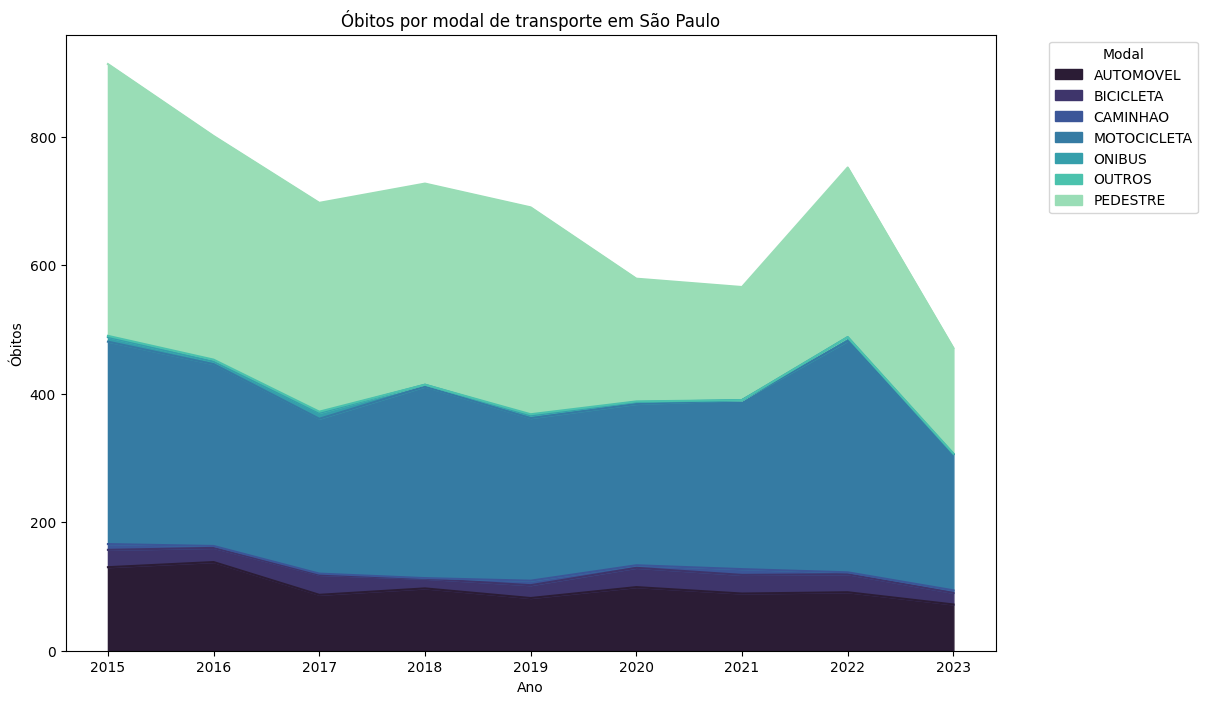

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame and it's structured correctly
# If not, you might need to pivot the DataFrame first

# # Pivoting the DataFrame if necessary
# df_pivot = ano_por_modal.pivot_table(index='ano', columns='Tipo do veículo da vítima', values='Data e Hora do Acidente')
colors = sns.color_palette("mako", n_colors=len(df_pivot.columns))
# Plotting
df_pivot.plot.area(figsize=(12, 8),color = colors)
plt.title('Óbitos por modal de transporte em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_pivot.index)  # Ensuring that all years are shown on the x-axis
# plt.tight_layout()
# plt.figure(figsize=(20, 50))

plt.show()

# sns.color_palette("mako, as_cmap=True)


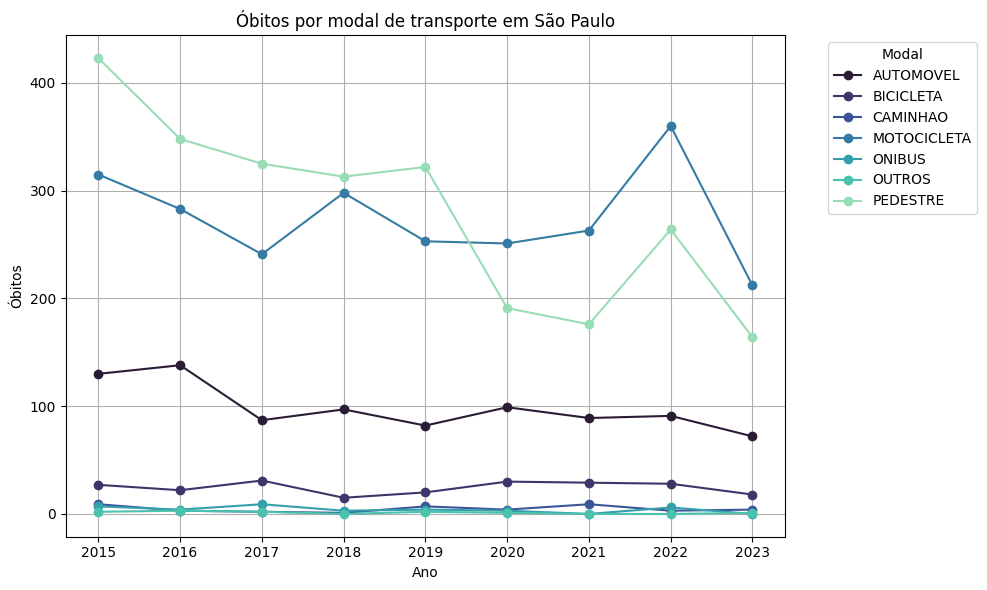

In [ ]:


# Plotting the line chart with the chosen color palette and size
df_pivot.plot(figsize=(10, 6), color=colors, marker='o')
plt.title('Óbitos por modal de transporte em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_pivot.index)  # Ensuring that all years are shown on the x-axis
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()
plt.show()


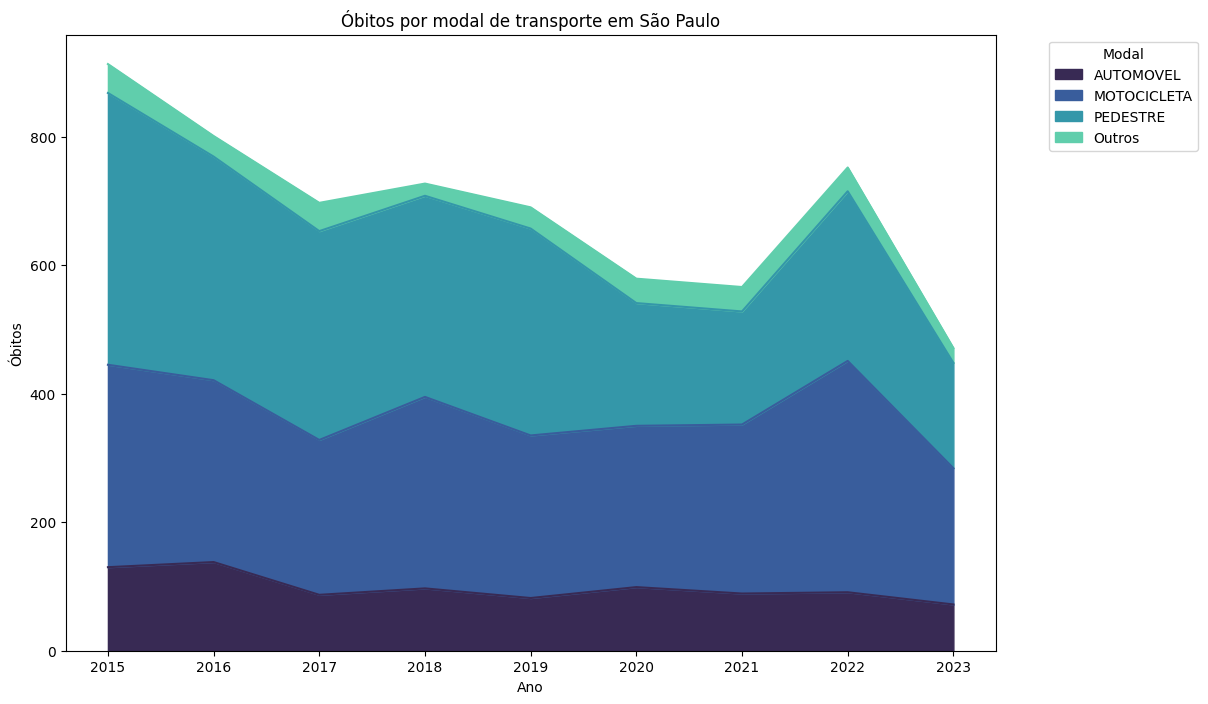

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame and it's structured correctly
# If not, you might need to pivot the DataFrame first

# # Pivoting the DataFrame if necessary
# df_pivot = ano_por_modal.pivot_table(index='ano', columns='Tipo do veículo da vítima', values='Data e Hora do Acidente')
colors = sns.color_palette("mako", n_colors=len(df_pivot_simpl.columns))
# Plotting
df_pivot_simpl.plot.area(figsize=(12, 8),color = colors)
plt.title('Óbitos por modal de transporte em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_pivot_simpl.index)  # Ensuring that all years are shown on the x-axis
# plt.tight_layout()
# plt.figure(figsize=(20, 50))

plt.show()

# sns.color_palette("mako, as_cmap=True)


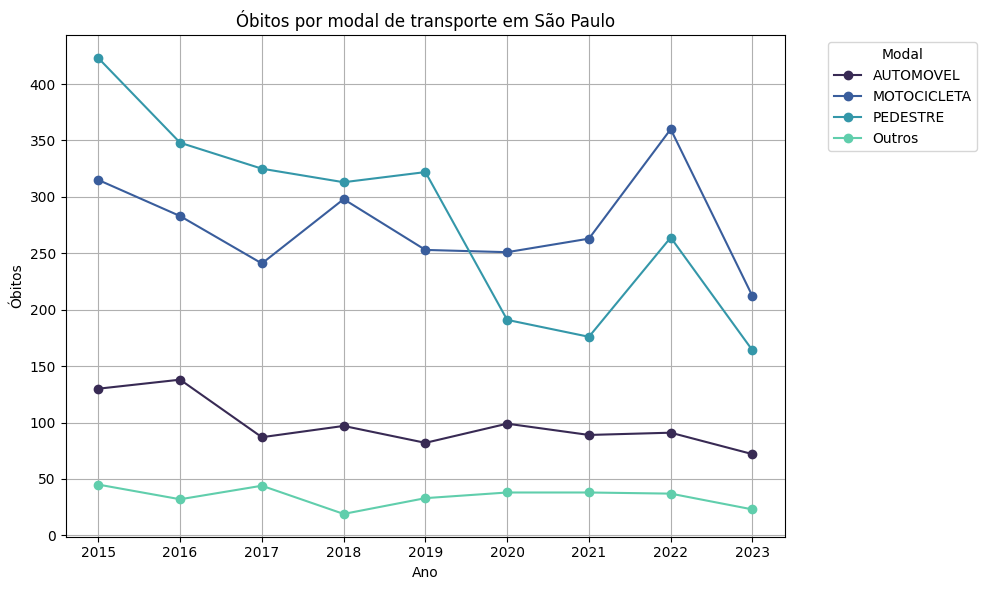

In [ ]:


# Plotting the line chart with the chosen color palette and size
df_pivot_simpl.plot(figsize=(10, 6), color=colors, marker='o')
plt.title('Óbitos por modal de transporte em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_pivot_simpl.index)  # Ensuring that all years are shown on the x-axis
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()
plt.show()
